In [1]:
%matplotlib inline

In [2]:
#using xarray for data read
import xarray as xa

#using Cartopy for mapping
import matplotlib.pyplot as plt
import cmocean


In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(13, 8),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

In [7]:
#greater bering region
extent = [-180, -135, 45, 75]


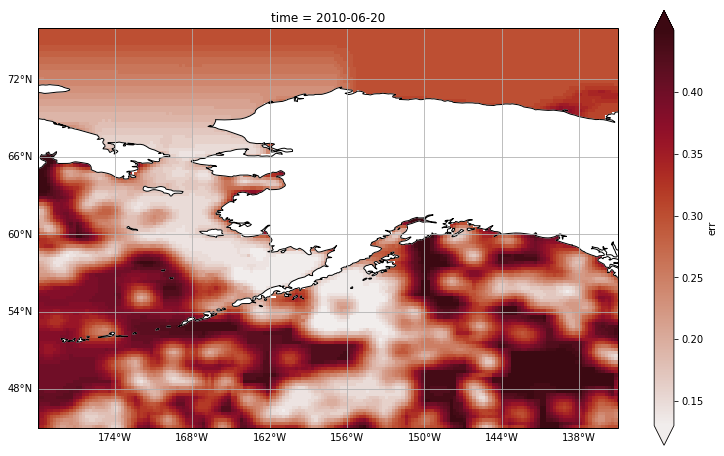

In [10]:
#avhrr only data is whats available at esrl
threddspath='https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.oisst.v2.highres/sst.day.err.2010.v2.nc'

cmap = cmocean.cm.amp
with xa.open_dataset(threddspath) as xadf:
    fig,ax = make_map(projection=ccrs.PlateCarree(-160))
    xadf['err'].isel(time=170,lat=slice(-180,-45),lon=slice(-750,-500)).plot(x='lon', y='lat',
                                                                             robust=True,ax=ax,
                                                                             transform=ccrs.PlateCarree(),
                                                                             cmap=cmap)
    ax.add_feature(land_50m)
    ax.coastlines(resolution='50m')
    ax.set_extent(extent)

In [ ]:
#avhrr+amsr data is available for 2002-2011 from ncei
